## Power balanced projection methods for time-continuous dynamic simulations

In [104]:
# Imports
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import rpm_module as rpm
import sympy as sp

import PH_models as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RPM solver for PHS conservative systems

In [105]:
"""
def gradients(x):
    grad1 = x[0] / C0
    grad2 = x[1] * L0
    return np.array((grad1, grad2))

def hessian(x):
    NPoints = x.shape[1]
    hessian = np.zeros((2,2,NPoints))
    hessian[0,0,:] = np.ones(NPoints) / C0 
    hessian[1,1,:] = np.ones(NPoints) * L0
    return hessian"""

'\ndef gradients(x):\n    grad1 = x[0] / C0\n    grad2 = x[1] * L0\n    return np.array((grad1, grad2))\n\ndef hessian(x):\n    NPoints = x.shape[1]\n    hessian = np.zeros((2,2,NPoints))\n    hessian[0,0,:] = np.ones(NPoints) / C0 \n    hessian[1,1,:] = np.ones(NPoints) * L0\n    return hessian'

In [106]:
phs_struct = model.triangle.build_linear_auto(1, 1, 1)

In [107]:
#Solver parameters
p_order = 3
k_order  = 1
sr = 3
stepSize = 1/sr
quadOrder = 20
epsilon = 10**(-15)
maxIter = 100

In [108]:
solver = rpm.RPMSolverPHS(phs_struct, p_order, k_order, stepSize,
    quadOrder, epsilon, maxIter)

(100, 3)


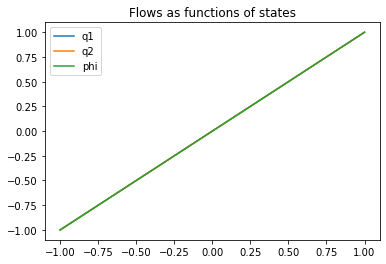

In [109]:
x = np.array([np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)]).T
rpm.hp.plot_gradients(solver, np.linspace(-1, 1, 100), ["q1", "q2", "phi"])

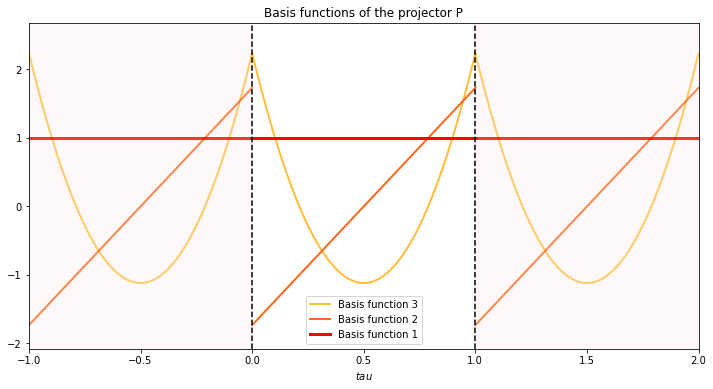

In [110]:
fig1 = rpm.hp.plot_basis_P(solver)

In [118]:
init = np.zeros(len(phs_struct["States"]), dtype= np.float64)
init[2] = 2
duration = 100
t = np.linspace(0, duration, int(duration/stepSize))
x, dx_proj, l_mults, dx_regul = solver.simulate(init, duration)

Mean number of NR iterations : 1.0
Max number of NR iterations : 1.0,              step index : 0


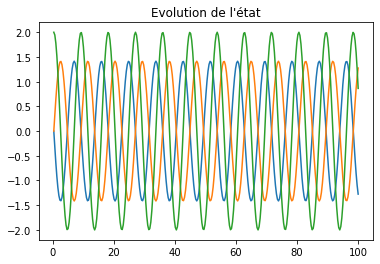

In [119]:
plt.figure()
plt.title("Evolution de l'état")
plt.plot(t[1:],x)

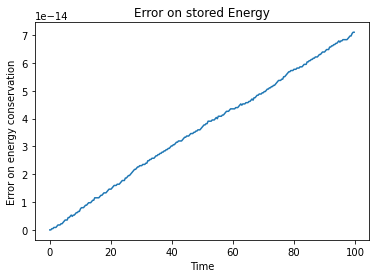

In [120]:
rpm.hp.plot_error_energy(solver, x, t)

In [121]:
#rpm.hp.plot_flows_trajectories(solver, dx_proj[0:100], dx_regul[0:100], N_points=50)

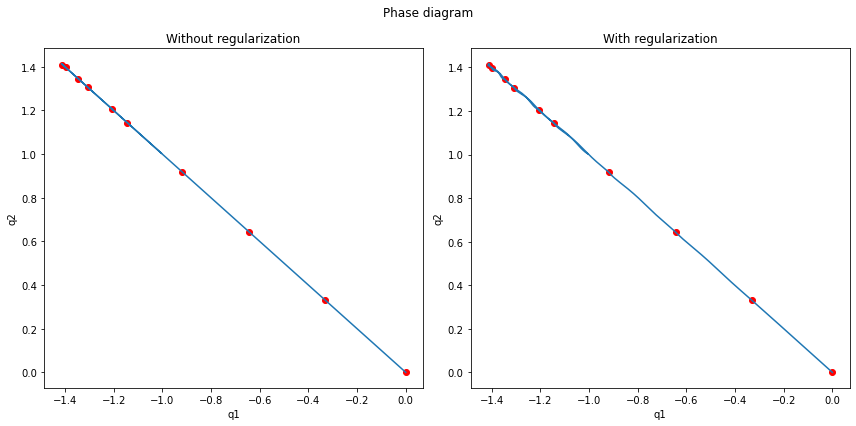

In [122]:
fig = rpm.hp.plot_phase_diagram_2D(solver, x[0:10], dx_proj[0:10], dx_regul[0:10], N_points=50)

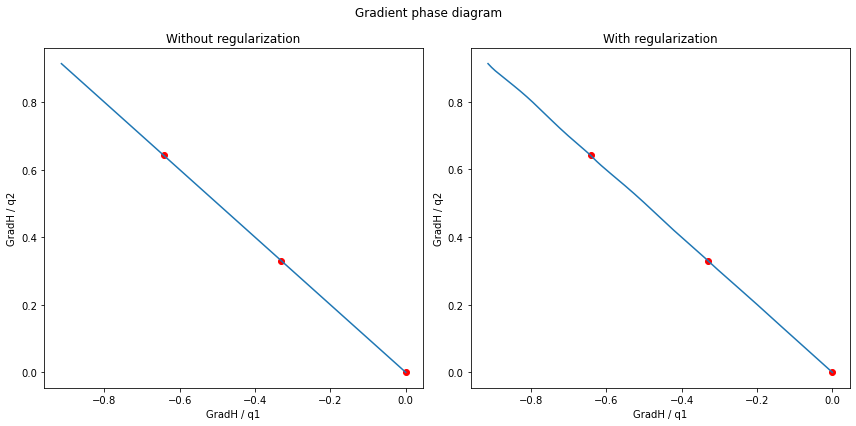

In [123]:
fig = rpm.hp.plot_gradients_phase(solver, x[0:3], dx_proj[0:3], dx_regul[0:3], N_points=50)

In [117]:
print(x[0:5])

[[ 2.          0.          0.        ]
 [-0.02764941 -1.97235059  0.33025548]
 [ 1.89093132  0.10906868  0.64224821]
 [-0.2397554  -1.7602446   0.91872537]
 [ 1.58751724  0.41248276  1.14439809]]
